# Problem description

You are to predict whether a company will go bankrupt in the following year, based on financial attributes of the company.

Perhaps you are contemplating lending money to a company, and need to know whether the company
is in near-term danger of not being able to repay.


## Goal

## Learning objectives

- Demonstrate mastery on solving a classification problem and presenting
the entire Recipe for Machine Learning process in a notebook.
- We will make suggestions for ways to approach the problem
    - But there will be little explicit direction for this task.
- It is meant to be analogous to a pre-interview task that a potential employer might assign
to verify your skill

# Import modules

In [1]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import math

%matplotlib inline


# API for students

In [2]:
## Load the bankruptcy_helper module

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# Import bankruptcy_helper module
import bankruptcy_helper
%aimport bankruptcy_helper

helper = bankruptcy_helper.Helper()

# Get the data

The first step in our Recipe is Get the Data.

- Each example is a row of data corresponding to a single company
- There are 64 attributes, described in the section below
- The column `Bankrupt` is 1 if the company subsequently went bankrupt; 0 if it did not go bankrupt
- The column `Id` is a Company Identifier

In [3]:
# Data directory
DATA_DIR = "./Data"

if not os.path.isdir(DATA_DIR):
    DATA_DIR = "../resource/asnlib/publicdata/bankruptcy/data"

data_file = "5th_yr.csv"
data = pd.read_csv( os.path.join(DATA_DIR, "train", data_file) )

target_attr = "Bankrupt"

n_samples, n_attrs = data.shape
print("Date shape: ", data.shape)

Date shape:  (4818, 66)


## Have a look at the data

We will not go through all steps in the Recipe, nor in depth.

But here's a peek

In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.41769,0.0568,1.1605,-126.39,0.41355,0.025417,1.2395,1.16500,0.51773,...,0.049094,0.85835,0.12322,5.6167,7.4042,164.310,2.2214,1.334,0,4510
1,-0.023834,0.2101,0.50839,4.2374,22.034,0.058412,-0.027621,3.6579,0.98183,0.76855,...,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.802,6.4782,0,3537
2,0.030515,0.44606,0.19569,1.565,35.766,0.28196,0.039264,0.88456,1.05260,0.39457,...,0.077337,0.95006,0.25266,15.049,2.8179,104.730,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.68,438.2,0.13649,0.058164,10.853,1.02790,0.61173,...,0.085524,0.97282,0,6.0157,7.4626,48.756,7.4863,1.0602,0,1806
4,0.000992,0.49712,0.12316,1.3036,-71.398,0,0.001007,1.0116,1.29210,0.50288,...,0.001974,0.99925,0.019736,3.4819,8.582,114.580,3.1854,2.742,0,1529


Pretty *unhelpful* !

What are these mysteriously named features ?

## Description of attributes

This may still be somewhat unhelpful for those of you not used to reading Financial Statements.

But that's partially the point of the exercise
- You can *still* perform Machine Learning *even if* you are not an expert in the problem domain
    - That's what makes this a good interview exercise: you can demonstrate your thought process even if you don't know the exact meaning of the terms
- Of course: becoming an expert in the domain *will improve* your ability to create better models
    - Feature engineering is easier if you understand the features, their inter-relationships, and the relationship to the target

Let's get a feel for the data
- What is the type of each attribute ?


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
X1          4818 non-null object
X2          4818 non-null object
X3          4818 non-null object
X4          4818 non-null object
X5          4818 non-null object
X6          4818 non-null object
X7          4818 non-null object
X8          4818 non-null object
X9          4818 non-null float64
X10         4818 non-null object
X11         4818 non-null object
X12         4818 non-null object
X13         4818 non-null float64
X14         4818 non-null object
X15         4818 non-null object
X16         4818 non-null object
X17         4818 non-null object
X18         4818 non-null object
X19         4818 non-null float64
X20         4818 non-null float64
X21         4818 non-null object
X22         4818 non-null object
X23         4818 non-null float64
X24         4818 non-null object
X25         4818 non-null object
X26         4818 non-null object
X27         4818 non-null obje

You may be puzzled:
- Most attributes are `object` and *not* numeric (`float64`)
- But looking at the data via `data.head()` certainly gives the impression that all attributes are numeric

Welcome to the world of messy data !  The dataset has represented numbers as strings.
- These little unexpected challenges are common in the real-word
- Data is rarely perfect and clean

So we will first have to convert all attributes to numeric

**Question**

Create an all-numeric version of the data.  Assign it to the variable `data` (replacing the original)

**Hint**
- Look up the Pandas method `to_numeric`
    - We suggest you use the option `errors='coerce'`
    

In [6]:
### BEGIN SOLUTION
non_numeric_cols = data.select_dtypes(exclude=['float', 'int']).columns
data[ non_numeric_cols] = data[ non_numeric_cols ].apply(pd.to_numeric, downcast='float', errors='coerce')
### END SOLUTION

Let's look at the data again, now that it is numeric

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
X1          4816 non-null float32
X2          4816 non-null float32
X3          4816 non-null float32
X4          4803 non-null float32
X5          4808 non-null float32
X6          4816 non-null float32
X7          4816 non-null float32
X8          4804 non-null float32
X9          4818 non-null float64
X10         4816 non-null float32
X11         4816 non-null float32
X12         4803 non-null float32
X13         4818 non-null float64
X14         4816 non-null float32
X15         4812 non-null float32
X16         4804 non-null float32
X17         4804 non-null float32
X18         4816 non-null float32
X19         4818 non-null float64
X20         4818 non-null float64
X21         4744 non-null float32
X22         4816 non-null float32
X23         4818 non-null float64
X24         4702 non-null float32
X25         4816 non-null float32
X26         4804 non-null float32
X27      

Hopefully you will see that all the attributes are now numeric.

Surprise !

Looks like there are some examples with undefined values for some features !
- Why didn't we see this when the data was not encoded as numbers ?



**Question**

List all the attributes of `data` that are missing from at least one example.

Set list `attrs_missing` to either a list or array of attributes that are missing from at least one example.

In [8]:
### BEGIN SOLUTION

num_examples = data.shape[0]
num_examples_undefined = data.isnull().sum(axis=0)
attrs_missing = num_examples_undefined[ num_examples_undefined > 0 ].index.tolist()
### END SOLUTION

In [9]:
print("Attributes with values missing for at least some examples\t:\n\t" + "\n\t".join(attrs_missing))

Attributes with values missing for at least some examples	:
	X1
	X2
	X3
	X4
	X5
	X6
	X7
	X8
	X10
	X11
	X12
	X14
	X15
	X16
	X17
	X18
	X21
	X22
	X24
	X25
	X26
	X27
	X28
	X29
	X32
	X33
	X34
	X35
	X36
	X37
	X38
	X40
	X41
	X45
	X46
	X47
	X48
	X50
	X51
	X52
	X53
	X54
	X57
	X59
	X60
	X61
	X63
	X64


So it looks like you will have to deal with missing data at some point.

We won't do this just now; you will need to address the issue yourself later.

But you will hopefully see that our target (`Bankrupt`) is not missing in any example

In [10]:
assert( not target_attr in set(attrs_missing) )

The label/target is included in this dataset
- It is the attribute `Bankrupt`
- Let's separate it from the feature attributes so we don't accidentally train the model with a feature that **is** the target !

In [11]:
data, labels = data.drop(columns=[target_attr]), data[target_attr]
print("Data shape: ", data.shape)

Data shape:  (4818, 65)


We will shuffle the examples before doing anything else.

In [12]:
# Shuffle the data first
data, labels = sklearn.utils.shuffle(data, labels, random_state=42)

print("Labels shape: ", labels.shape)
print("Label values: ", np.unique(labels))


Labels shape:  (4818,)
Label values:  [0 1]


We will evaluate your submission on a test dataset that we provide
- It has no labels, so **you** can't use it to evaluate your model, but **we** have the labels
- We will call this evaluation dataset the "holdout" data

Let's get it

In [13]:
holdout_data = pd.read_csv( os.path.join(DATA_DIR, "holdout", '5th_yr.csv') )

print("Data shape: ", holdout_data.shape)


Data shape:  (1092, 65)


<font style="font-size:150%;background-color:black;" color='white' >Question</font>

## Create a test set 

To train and evaluate a model, we need to split the original dataset into
a training subset (in-sample) and a test subset (out of sample).

Although **we** are the only ones with the holdout dataset, you probably want
to perform out of sample evaluation of your model.

**Question**

<font style="font-size:250%;background-color:green;" color='white' >Question</font>

Split the data 
- 90% will be used for training the model
- 10% will be used as validation (out of sample) examples
- Use `train_test_split()` from `sklearn` to perform this split
    -  Set the `random_state` parameter of `train_test_split()` to be 42


In [14]:
# Split data into train and test
# Create variables X_train, X_test, y_train, y_test
#   X_train: training examples
#   y_train: labels of the training examples
#   X_test:  test examples
#   y_test:  labels of test examples

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.10, random_state=42)

### END SOLUTION

In [15]:
X_train.shape
X_test.shape

(4336, 65)

(482, 65)

# Exploratory Data Analysis

You may want to analyze potential relationships
- Between features and the target
- Between pairs/groups of features

We'll make some suggestions but, ultimately it is up to you.

**Warning**

We will perform *our* exploration using the raw data
- Thus, there may be features with missing values
- This may affect your analysis
- For example: how is the correlation of 2 features computed when their are missing values ?
- For the purpose of answering the questions: leave the missing values in place
- For *your* model: feel free to deal with missing features before doing Exploratory Data Analysis

**Remember**

- Base your analysis on `X_train`, don't peek at your out of sample data !


## Features correlated with the target

**Question**

List the 5 features whose correlations with the target are largest (most positive).


Set variable `corr_features`
- To be a list or array with the names (e.g., `X3`) of the 5 features
- Most highly correlated with `Bankrupt`
- *In *descending order*

**Hint**
- Look up the Pandas `corr` method
- Look up the Pandas `sort_values`

In [16]:
### BEGIN SOLUTION

# Put target back with data to facilitate correlation
df = X_train.copy()
df[ target_attr ] = y_train
corr_matrix = df.corr()

target_corr = corr_matrix['Bankrupt'].sort_values(ascending = False)
corr_features = target_corr.index[ 1:6 ].tolist()

### END SOLUTION

In [17]:
print("Features most correlated with target: ", corr_features)

Features most correlated with target:  ['X2', 'X51', 'X32', 'X9', 'X36']


## Mutually correlated features

When you have a lot of features, you might discover that some of them convey little information
- Pairs of highly correlated features
- A small number of features that adequately represent the whole
    - In the Unsupervised Learning lecture, we will learn about PCA, a way to discover a small set of synthetic features that capture the whole

**Question**

- List the 5 features whose correlations with the `X1` are largest (most positive).
    - Set variable `X1_corr_p`
    - To be a list or array with the names (e.g., `X3`) of the 5 features
    - Most highly correlated
    - *In *descending order*
    
- List the 5 features whose correlations with the `X1` are *most negative*.
    - Set variable `X1_corr_n`
    - To be a list or array with the names (e.g., `X3`) of the 5 features
    - Most highly *negatively* correlated
    - *In *ascending order* (most negative first)

In [18]:
### BEGIN SOLUTION

# Put target back with data to facilitate correlation
df = X_train.copy()
df[ target_attr ] = y_train
corr_matrix = df.corr()

X1_corr = corr_matrix['X1'].sort_values(ascending = False)

X1_corr_p = X1_corr.index[ 1: 6].tolist()
X1_corr_n = X1_corr.index[ -1: - 6 : -1 ].tolist()


### END SOLUTION

In [19]:
print("Features most positively correlated with X1", X1_corr_p)
print("Features most negatively correlated with X1", X1_corr_n)

Features most positively correlated with X1 ['X7', 'X14', 'X11', 'X22', 'X35']
Features most negatively correlated with X1 ['X36', 'X38', 'X10', 'X25', 'X53']


One thing to consider (we saw something similar in the lecture topic on Influential Points)
- Outliers (feature values that are at the extremes of the distribution) can affect correlation

To illustrate:
- We will show the distribution of one feature, conditional on the value of the associated target value
- Here we overlay two distributions
    - The distribution of the feature value, conditioned on examples having target 0 (colored green)
    - The distribution of the feature value, conditioned on examples having target 1 (colored red)
    - When the two distributions overlap: the color will be a blend



In [20]:

def plot_attr(df, attr, trunc=.01):
    X = df[attr]
    
    # Remove outliers, to improve clarity
    mask = (X > X.quantile(trunc)) & (X < X.quantile(1-trunc))
    X_trunc, y_trunc = X[ mask  ], y_train[ mask ]

    bins = np.linspace( int(X_trunc.min()), int(X_trunc.max() +1), 30)
    
    fig, ax = plt.subplots( figsize=(8,4))
    color = 'tab:green'
    ax.set_xlabel(attr)
    ax.set_ylabel('count', color=color)
    data = X_trunc[ y_trunc == 0 ]
    ax.hist( data, bins, alpha=0.5, label='0', color=color, weights=np.ones(len(data)) / len(data))
    ax.tick_params(axis='y', labelcolor=color)

    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:red'
    ax2.set_xlabel(attr)
    ax2.set_ylabel('count', color=color)
    data =  X_trunc[ y_trunc == 1 ]
    ax2.hist( data, bins, alpha=0.5, label='1', color=color, weights=np.ones(len(data)) / len(data))
    ax2.tick_params(axis='y', labelcolor=color)



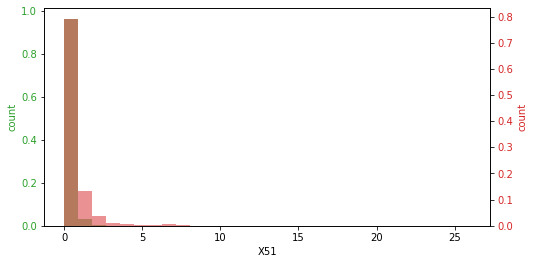

In [21]:
plot_attr(X_train, "X51", trunc=0)

The above graph is not very informative
- The distributions overlap for the bins chosen
- But there seem to be many bins with very few values (i.e. X51 > 2)

But let's perform the same plot while *eliminating* extreme values of the feature

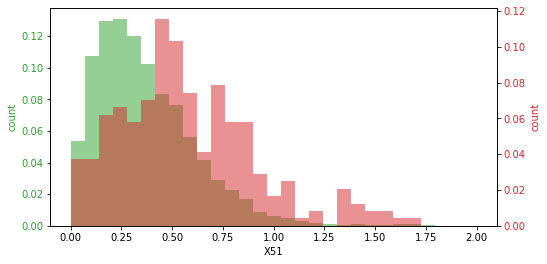

In [22]:
plot_attr(X_train, "X51", trunc=.01)

We can now see that
- When the feature value is greater than 1.25
- The associated example indicates the company will go Bankrupt (`Bankrupt` = 1)

Just something to keep in mind in performing your own analysis and building your models
- Is there value in creating a synthetic feature: `X51 > t` for some threshold `t` ?

**Question**

- Let `t = 1.1`
- Set variable `cond_frac_pos` to the fraction of examples that go Bankrupt where `X51 > t`
$$
\frac{ \text{count(Bankrupt == 1 and X51 > t} )} { \text{count(Bankrupt == 1)} }
$$

- Set variable `cond_frac_pneg` to the fraction of examples that *do not* go Bankrupt where `X51 > t`
$$
\frac{ \text{count(Bankrupt == 0 and X51 > t} )} { \text{count(Bankrupt == 0)} }
$$


In [23]:
### BEGIN SOLUTION
def cond_attr(df, attr, trunc=.01, thresh=1):
    X = df[attr]
    
    # Remove outliers, to improve clarity
    mask = (X > X.quantile(trunc)) & (X < X.quantile(1-trunc))
    X_trunc, y_trunc = X[ mask  ], y_train[ mask ]
    
    # Condition on value of target and thresh
    cp = X_trunc[ (y_trunc == 1) & (X_trunc > thresh) ].size/X_trunc[ y_trunc == 1].size
    cn = X_trunc[ (y_trunc == 0) & (X_trunc > thresh) ].size/X_trunc[ y_trunc == 0].size
      
    return cp, cn

attr = "X51"
t = 1.1
trunc=0
cond_frac_pos, cond_frac_neg = cond_attr(X_train, attr, trunc=trunc, thresh=t)
### END SOLUTION

print("The fraction of training examples that go Bankrupt, with ({attr:s} > {t:2.2f}) is {frac:3.1%}".format(attr=attr, 
                                                                                        t=t,
                                                                                        frac=cond_frac_pos)
     )

print("The fraction of training examples that DO NOT go Bankrupt, with ({attr:s} > {t:2.2f}) is {frac:3.1%}".format(attr=attr, 
                                                                                        t=t,
                                                                                        frac=cond_frac_neg)
     )


The fraction of training examples that go Bankrupt, with (X51 > 1.10) is 14.4%
The fraction of training examples that DO NOT go Bankrupt, with (X51 > 1.10) is 1.6%


It seems that we can discover a large fraction of examples that go Bankrupt by examining 
one feature and threshold.

But using this alone will result in some number of False Positives (non Bankrupt examples)
- And although the percent is small, we will see that the non Bankrupt examples are more numerous

# Imbalanced data

We have a binary classification problem.

Do we have roughly the same number of examples associated with each of the two targets ?

**Question**

How many training examples do we have that became Bankrupt ?
- Set variable `num_bankrupt` to this value

How many training examples do we have that *did not become* Bankrupt ?
- Set variable `num_nonbankrupt` to this value

In [24]:
num_examples = X_train.shape[0]

### BEGIN SOLUTION
bankrupt = X_train[ y_train == 1 ] 
nonbankrupt = X_train[ y_train == 0 ]

num_bankrupt    = bankrupt.shape[0]
num_nonbankrupt = nonbankrupt.shape[0]

### END SOLUTION

In [25]:
print("Of the {t:d} total examples: {b:d} became bankrupt and {nb:d} did not become bankrupt".format(t=num_examples,
                                                                                                    b=num_bankrupt,
                                                                                                    nb=num_nonbankrupt)

     )

Of the 4336 total examples: 268 became bankrupt and 4068 did not become bankrupt


In [26]:
assert( num_bankrupt + num_nonbankrupt == num_examples )

This dataset is highly imbalanced: many more examples of one class than the other.

Why might this be a problem ?
    

Consider a naive model that ignores the features and always predicts the *most frequent* value of the target.

Assuming the out of sample data has the same distribution as the training data:
- We will have perfect conditional accuracy for the examples with target in the majority class
- We will have zero conditional accuracy for the examples with target in the non-majority class
- Because the number of examples in the majority class is so much larger:
    - We might get good unconditional accuracy

Recall our lecture on Recall and Precision.

These are metrics that will help us evaluate our model's ability to correctly predict Bankruptcy.

We think that you will find that your model may have
- High Accuracy
- Low Recall

There are several ways for you to deal with imbalanced data
- Class sensitive weights
    - Many models in `sklearn` take an optional argument `class_weight`
    - For each target class: you can assign a weight
    - The Loss will be computed on a class-weighted basis
    - You can choose weights that increase the influence of the non-majority class

Another way is re-sampling the training set
- Expand the number of training examples
- By increasing the number of examples of the non-majority class
    - Randomly sample examples in the non-majority class
    - So you will have duplicates
- This creates a more balanced dataset on which to train

These are just some ideas for you to achieve a model with better
conditional metrics.

# Your model

Time for you to continue the Recipe for Machine Learning on your own.

Follow the steps and submit your *best* model.

For your best model, using the test set you created, report
- Accuracy 
- Recall
- Precision

We will evaluate your model using the holdout data.  Grades will be based on
the following metrics meeting certain thresholds
- Accuracy
- Recall
- Precision

We will evaluate the metric using 3 increasing values for the threshold
- You will get points for each threshold that you surpass

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 

from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA


from sklearn.metrics import confusion_matrix, recall_score, precision_score, classification_report

impute_transformer = SimpleImputer(strategy='median')

# logistic_clf = linear_model.LogisticRegression(solver = 'liblinear', max_iter = 10000)
svm_clf = SVC(gamma="auto", C=.1)
forest_clf = RandomForestClassifier(n_estimators=50, random_state=42)

r = "None"

for name, clf in { "SVM": svm_clf,
                   "Random Forest": forest_clf
                 }.items():
    
    pipe = Pipeline([("imputer", impute_transformer), 
                      ("model", clf)
                     ]
                    )
    
    scores = cross_val_score(pipe, X_train, y_train, cv=5)
    print("Model: {m:s} (t={r:s}) avg cross val score={s:3.4f}\n".format(m=name, r=r, s=scores.mean()) )

    # Out of sample prediction
    _= pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    accuracy_test = accuracy_score(y_test, y_pred)

    # recall_
    recall_test = recall_score(y_test, y_pred, pos_label=1, average="binary")
    precision_test = precision_score(y_test,   y_pred, pos_label=1, average="binary")


    print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                                a=accuracy_test,
                                                                                r=recall_test,
                                                                                p=precision_test
                                                                                )
         )

  

Model: SVM (t=None) avg cross val score=0.9382



/home/kjp/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SVM Accuracy: 91.7%, Recall 0.0%, Precision 0.0%
Model: Random Forest (t=None) avg cross val score=0.9412

	Random Forest Accuracy: 93.2%, Recall 25.0%, Precision 76.9%


In [28]:
y_train.shape,  y_train[ y_train == 0].shape[0]/y_train[ y_train == 1].shape[0]
8.08955224/0.53294002

((4336,), 15.17910447761194)

15.179104470330453

In [29]:
cw = sklearn.utils.class_weight.compute_class_weight("balanced", np.unique(y_train), y_train)
cwn = cw/cw.sum()

## Models wih Dimensionality reduction

- Reduce the number of features
    -Try other models
- Cost sensitive training

In [30]:
from sklearn.preprocessing import StandardScaler

stand_transformer = StandardScaler()

cwt = { 0:1, 1:20 }



for r in [ 1, 10, 12, 13, 15, 18]:
    cwt = { 0:1, 1:r }
    
    logistic_clf = linear_model.LogisticRegression(
        class_weight = cwt,
        solver = 'liblinear', max_iter = 10000)
    svm_clf = SVC(class_weight = cwt,
              gamma="auto", C=.1)
    
    for name, clf in { "SVM": svm_clf,
                       "Logistic": logistic_clf
                     }.items():

        pipe = Pipeline([("imputer", impute_transformer), 
                         ("Standardize", stand_transformer),
                         ("PCA", PCA(n_components = 20)),
                         ("model", clf)
                         ]
                        )
        scores = cross_val_score(pipe, X_train, y_train, cv=5)
        print("Model: {m:s} (t={r:d}) avg cross val score={s:3.4f}\n".format(m=name, r=r, s=scores.mean()) )

        # Out of sample prediction
        _= pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)

        accuracy_test = accuracy_score(y_test, y_pred)

        # recall_
        recall_test = recall_score(y_test, y_pred, pos_label=1, average="binary")
        precision_test = precision_score(y_test,   y_pred, pos_label=1, average="binary")

        
        print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                                    a=accuracy_test,
                                                                                    r=recall_test,
                                                                                    p=precision_test
                                                                                    )
             )
    

Model: SVM (t=1) avg cross val score=0.9382



/home/kjp/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SVM Accuracy: 91.7%, Recall 0.0%, Precision 0.0%
Model: Logistic (t=1) avg cross val score=0.9350

	Logistic Accuracy: 91.5%, Recall 0.0%, Precision 0.0%
Model: SVM (t=10) avg cross val score=0.8727

	SVM Accuracy: 85.7%, Recall 47.5%, Precision 28.4%
Model: Logistic (t=10) avg cross val score=0.8761

	Logistic Accuracy: 85.3%, Recall 47.5%, Precision 27.5%
Model: SVM (t=12) avg cross val score=0.8487

	SVM Accuracy: 82.6%, Recall 55.0%, Precision 25.0%
Model: Logistic (t=12) avg cross val score=0.8450

	Logistic Accuracy: 83.4%, Recall 62.5%, Precision 27.8%
Model: SVM (t=13) avg cross val score=0.8319

	SVM Accuracy: 81.3%, Recall 60.0%, Precision 24.5%
Model: Logistic (t=13) avg cross val score=0.8275

	Logistic Accuracy: 81.1%, Recall 62.5%, Precision 24.8%
Model: SVM (t=15) avg cross val score=0.7980

	SVM Accuracy: 78.4%, Recall 65.0%, Precision 22.4%
Model: Logistic (t=15) avg cross val score=0.7892

	Logistic Accuracy: 78.2%, Recall 75.0%, Precision 24.0%
Model: SVM (t=18) avg

In [31]:
y_test[ y_test == 1 ].shape

(40,)

## Submission guidelines

- You will implement the body of a subroutine `MyModel`
    - That takes as argument a Pandas DataFrame 
        - Each row is an example on which to predict
        - The features of the example are elements of the row
    - Performs predictions on each example
    - Returns an array or predictions with a one-to-one correspondence with the examples in the test set
    

We will evaluate your model against the holdout data
- By reading the holdout examples `X_hold` (as above)
- Calling `y_hold_pred = MyModel(X_hold)` to get the predictions
- Comparing the predicted values `y_hold_pred` against the true labels `y_hold` which are known only to the instructors

See the following cell as an illustration

**Remember**

The holdout data is in the same format as the one we used for training
- Except that it has no attribute for the target
- So you will need to perform all the transformations on the holdout data
    - As you did on the training data
    - Including turning the string representation of numbers into actual numeric data types

All of this work *must* be performed within the body of the `MyModel` routine you will write

We will grade you by comparing the predictions array you create to the answers known to us.

In [32]:

import pandas as pd
import os

def MyModel(X):
    # It should create an array of predictions; we initialize it to the empty array for convenience
    predictions = []
    
    # YOUR CODE GOES HERE
    
    ### BEGIN SOLUTION
    
    # Relative weight of Bankrupt class to Non Bankrupt class
    r = 13
    
    # Class weights
    cwt = { 0:1, 1:r }
    
    logistic_clf = linear_model.LogisticRegression(
        class_weight = cwt,
        solver = 'liblinear', max_iter = 10000)
    name = "Logistic"
   
    pipe = Pipeline([("imputer", impute_transformer), 
                     ("Standardize", stand_transformer),
                     ("PCA", PCA(n_components = 20)),
                     ("model", logistic_clf)
                     ]
                   )
   
    scores = cross_val_score(pipe, X_train, y_train, cv=5)
    print("Model: {m:s} (t={r:d}) avg cross val score={s:3.4f}\n".format(m=name, r=r, s=scores.mean()) )

    # Fit the model
    _= pipe.fit(X_train, y_train)
                    
    # Out of sample prediction 
    y_pred = pipe.predict(X)
    
 
    predictions = y_pred
### END SOLUTION
    
    return predictions



# Check your work: predict and evaluate metrics on *your* test examples
- Test whether your implementation of `MyModel` works
- See the metrics  your model produces

In [33]:
y_test_pred = MyModel(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred, pos_label=1, average="binary")
precision_test = precision_score(y_test,   y_test_pred, pos_label=1, average="binary")

print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_test,
                                                                            r=recall_test,
                                                                            p=precision_test
                                                                            )
         )

Model: Logistic (t=13) avg cross val score=0.8273

	Logistic Accuracy: 81.1%, Recall 62.5%, Precision 24.8%


In [34]:
assert(accuracy_test > 0.75)

In [35]:
assert( ( (recall_test  > 0.50) and (precision_test > 0.15) )
       or
        ( (recall_test  > 0.20) and (precision_test > 0.50) )
      )

In [36]:
# Extra points
assert(accuracy_test > .80)

In [37]:
# Extra points
assert( ( (recall_test > .60) and (precision_test > 0.20) )
       or
        ( (recall_test  > 0.20) and (precision_test > 0.60) )
      )

# This is how we will evaluate your model on the holdout examples

In [38]:
X_hold = pd.read_csv( os.path.join(DATA_DIR, "holdout", '5th_yr.csv') )

print("Data shape: ", X_hold.shape)

if False: # Only teacher can evaluate the rest: Needs true targets y_hold
    y_hold_pred = MyModel(X_hold)
    accuracy_hold = accuracy_score(y_hold, y_hold_pred)

    # recall_
    recall_hold = recall_score(y_hold, y_hold_pred, pos_label=1, average="binary")
    precision_hold = precision_score(y_hold,   y_hold_pred, pos_label=1, average="binary")


    print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                                a=accuracy_hold,
                                                                                r=recall_hold,
                                                                                p=precision_hold
                                                                                )
             )

Data shape:  (1092, 65)


# Discussion
- Most of the features are expressed as ratios: why is that a good idea ?
- Even if you don't understand all of the financial concepts behind the names of the attributes
    - You should be able to infer some relationships.  For example, here are some definitions of terms
$$
\begin{array}[lll] \\
X1   & = & \frac{\text{net profit} }{ \text{total assets} } \\
X9   & = & \frac{\text{sales}     }{ \text{total assets} } \\
X23  & = & \frac{\text{net profit} }{ \text{sales} } \\
\end{array}
$$

    - Therefore
$$
\begin{array}[lll] \\
X23  & = & \frac{X1}{X9} & \text{Algebra !}
\end{array}
$$

    - You might speculate that `net profit` is closely related to `gross profit`
        - The difference between "net" and "gross" is usually some type of additions/subtractions
    - Is this theory reflected in which features are most highly correlated with `X1` ?
- If you perform dimensionality reduction using PCA (the topic of the Unsupervised Learning lecture)
    - PCA is scale sensitive
    - If you *don't* scale the features: how many do you need to capture 95% of the variance ?
    - If you *do* scale the features: how many do you need to capture 95% of the variance ?